In [1]:
from pathlib import Path
import struct

ciphertexts = [int(x.strip(), 16)
               for x in open('data/2024-contest-sca-ct.txt', 'r').readlines()]
plaintexts = [int(x.strip(), 16)
              for x in open('data/2024-contest-sca-pt.txt', 'r').readlines()]

tr_raw = Path('data/2024-contest-sca-tr.bin').read_bytes()
tr_ref_raw = Path('data/2024-contest-sca-tr-reference.bin').read_bytes()

N = int.from_bytes(tr_raw[0:4], byteorder='little', signed=False)
L_ref = int.from_bytes(tr_ref_raw[4:8], byteorder='little', signed=False)
L = int.from_bytes(tr_raw[4:8], byteorder='little', signed=False)
waveform_ref = [struct.unpack(
    'f', tr_ref_raw[8 + i*4: 8 + (i+1)*4]) for i in range(L_ref)]
waveform = [
    [
        struct.unpack('f', tr_raw[8 + n * L * 4 +
                      i*4: 8 + n * L * 4 + (i+1)*4])[0]
        for i in range(L)
    ]
    for n in range(N)
]

print(f"N: {N}")
print(f"L_ref: {L_ref}")

N: 1000
L_ref: 14000


Text(0.5, 1.0, 'Given waveform (0~800)')

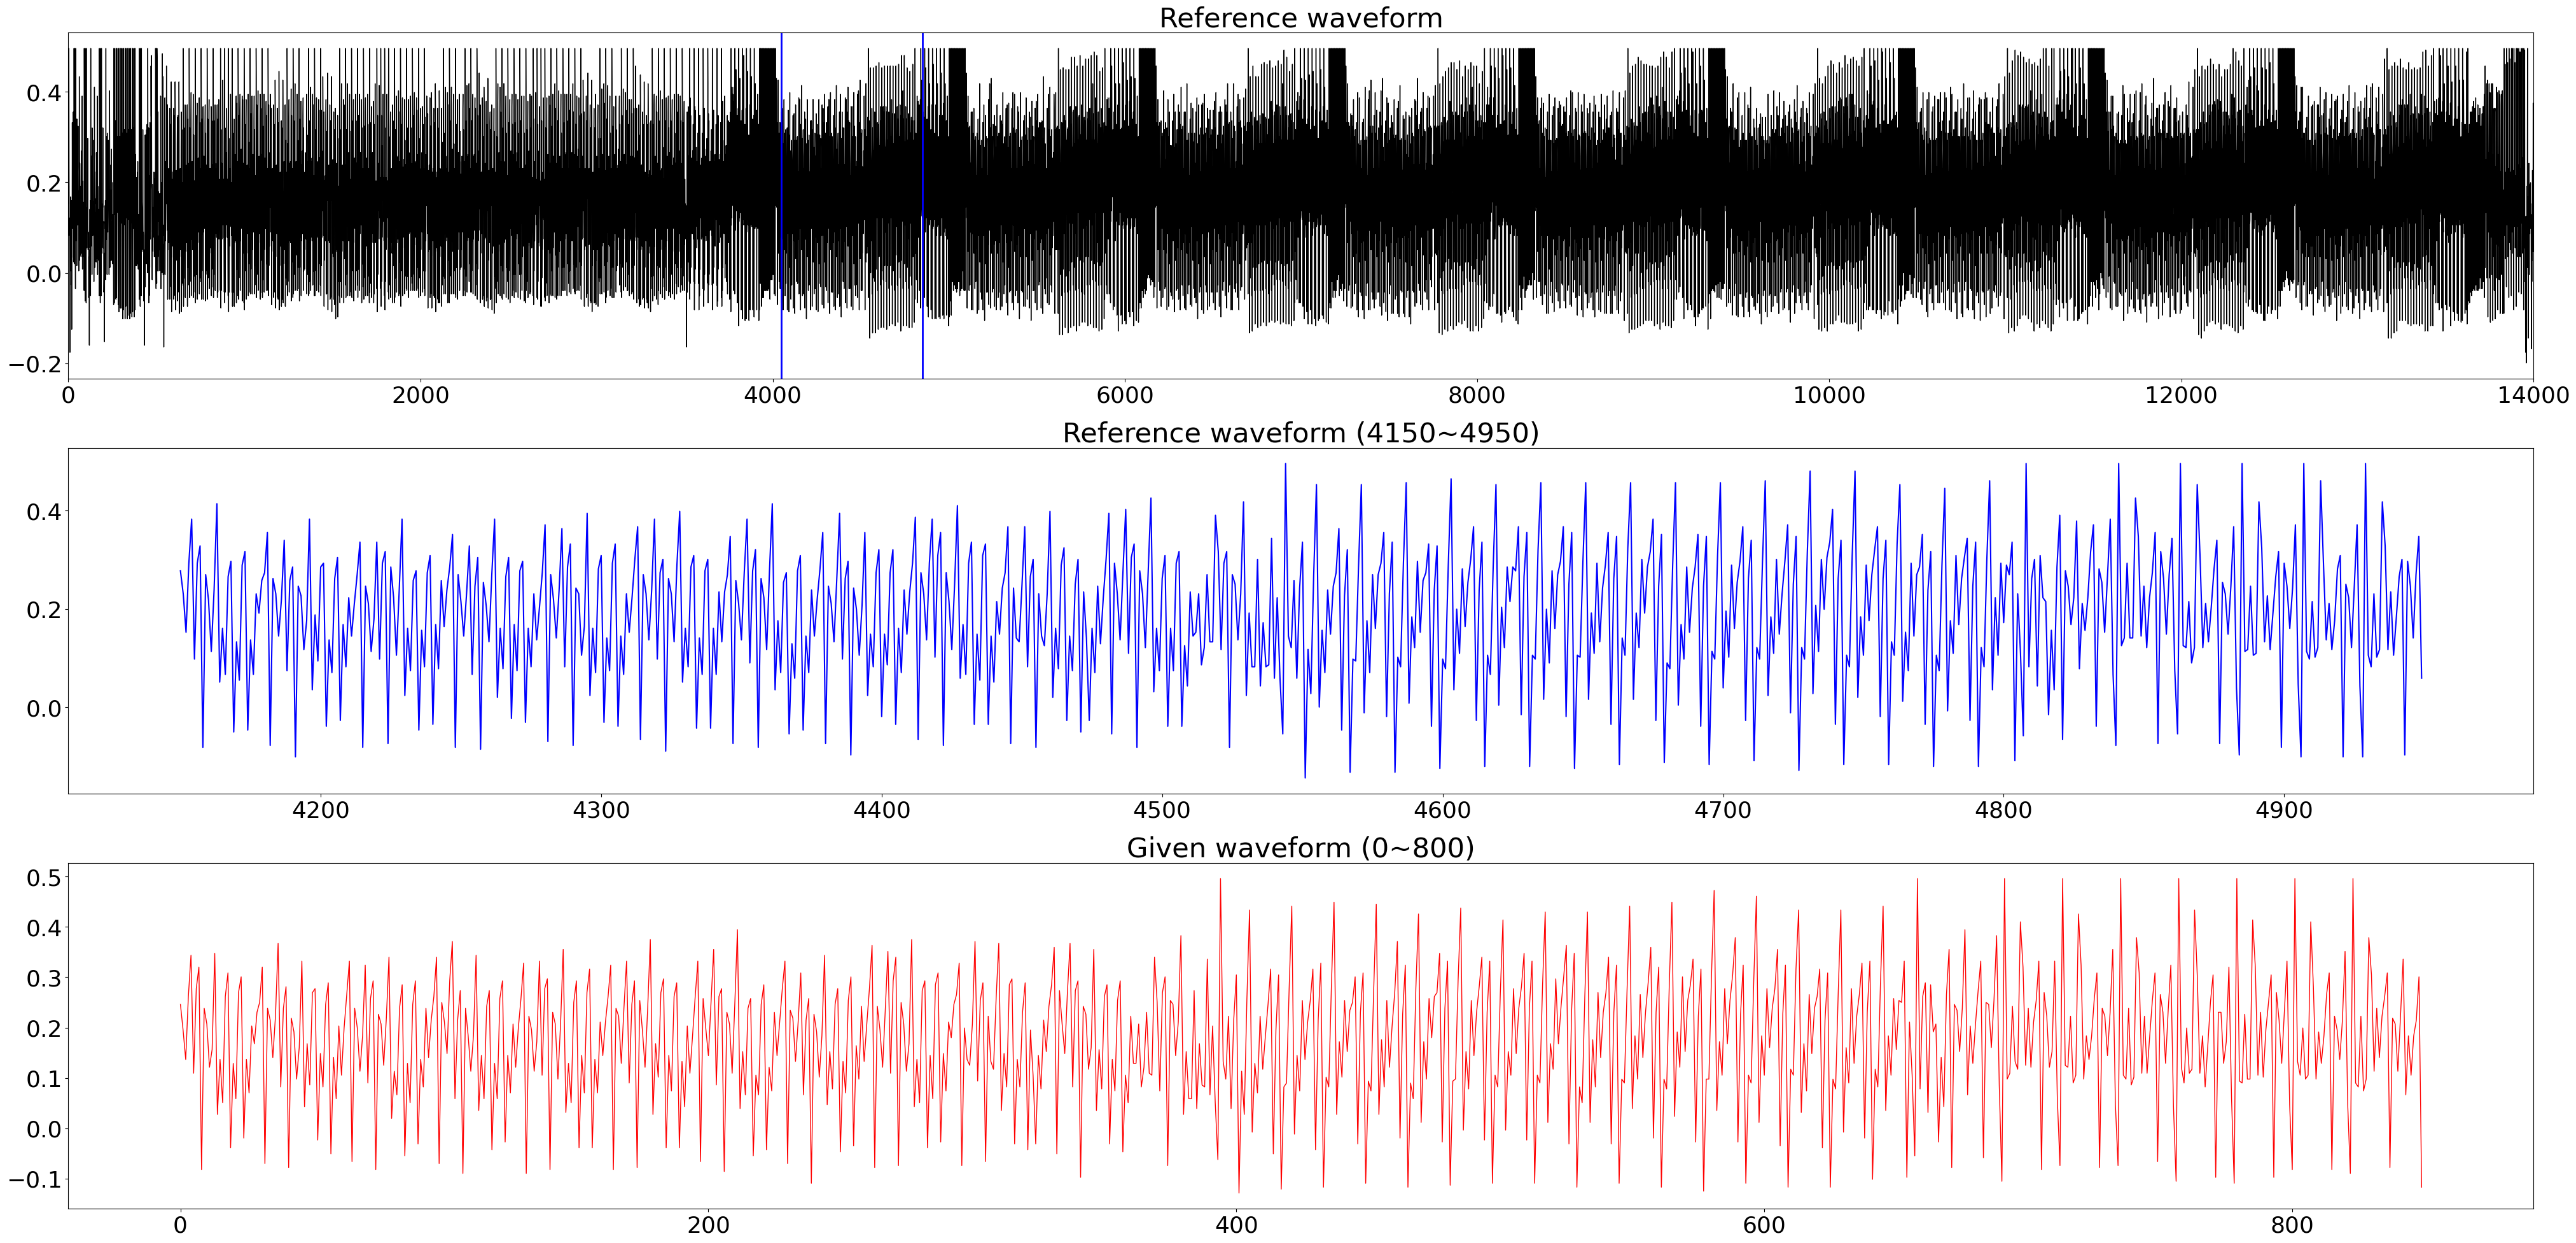

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 26})

N_plots = 3
plt.figure(figsize=(50, 8 * N_plots))

offset = 0
l = 14000 - offset
plt.subplot(N_plots, 1, 1)
plt.xlim(offset, L_ref)
plt.plot([i for i in range(offset, offset+l)], waveform_ref[offset:offset+l], linewidth=1, color='black')

plt.axvline(x=4050, linewidth=2, color='blue')
plt.axvline(x=4050+800, linewidth=2, color='blue')
plt.title('Reference waveform')

offset = 4150
l = 800
plt.subplot(N_plots, 1, 2)
plt.plot([i for i in range(offset, offset+l)], waveform_ref[offset:offset+l], color='blue')
plt.title('Reference waveform (4150~4950)')

plt.subplot(N_plots, 1, 3)
plt.plot([i for i in range(0, L)], np.array(waveform[2]), color='red', linewidth=1)
plt.title('Given waveform (0~800)')
# plt.show()